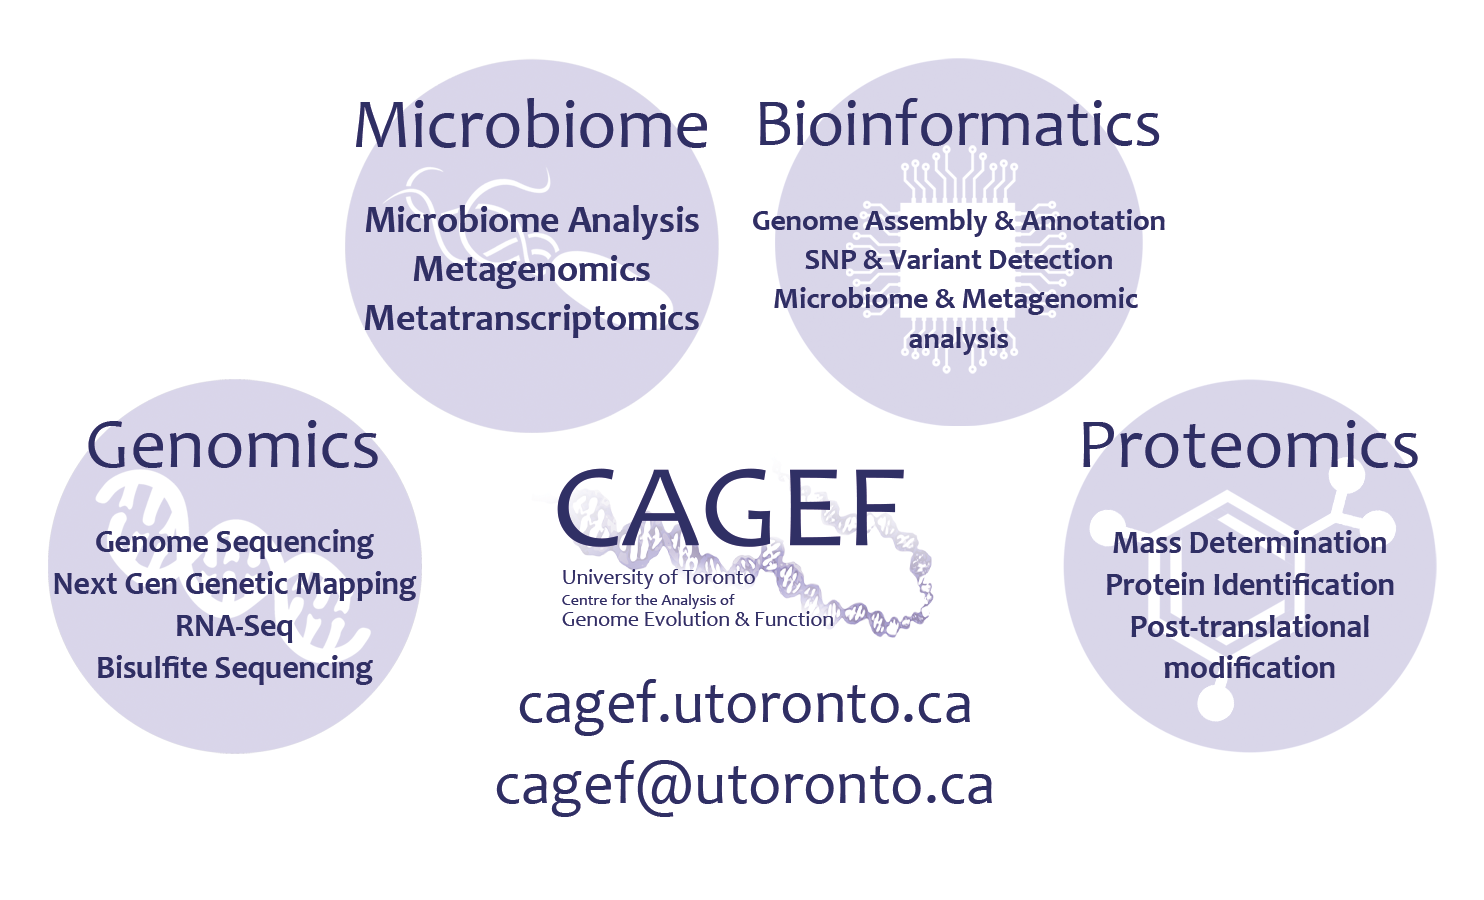

# Advanced Graphics and Data Visualization in R

# Assignment 04: BioMarts and Volcano plots can be Upsetting

## 0.1.0 An overview of Advanced Graphics and Data Visualization in R

__"Advanced Graphics and Data Visualization in R"__ is brought to you by the Centre for the Analysis of Genome Evolution & Function's (CAGEF) bioinformatics training initiative. This CSB1021 was developed to enhance the skills of students with basic backgrounds in R by focusing on available philosophies, methods, and packages for plotting scientific data. While the datasets and examples used in this course will be centred on SARS-CoV2 epidemiological and genomic data, the lessons learned herein will be broadly applicable.

This assignment is the fourth in a 6-part series. The aim for the end of this series is for students to recognize how to import, format, and display data based on their intended message and audience. The format and style of these visualizations will help to identify and convey the key message(s) from their experimental data.

At the start of each lecture, assignments will be provided for use on the [University of Toronto Jupyter Hub](https://jupyter.utoronto.ca/hub/login) so students can apply and familiarize themselves with the material from the lecture.

***
## 0.2.0 Lecture review

This week's lecture focused on the construction and interpretation of graphs based on differential expression data. Along with this we introduced a few other plot packages that help to generate Sankey diagrams, and Upset plots. Most importantly we focused on

1. Broad-level visualizations with MA and volcano plots
2. Gene-level visualizations with heatmap and dot plots
3. Gene-group categorizations through GO annotation and their visualizations

***
## 0.3.0 A legend for text format in Jupyter markdown

`grey background` - a package, function, code, command or directory. Backticks are also use for in-line code.      
*italics* - an important term or concept or an individual file or folder     
**bold** - heading or a term that is being defined      
<span style="color:blue">blue text</span> - named or unnamed hyperlink

`...` - Within each coding cell this will indicate an area of code that students will need to complete for the code cell to run correctly. 

<div class="alert alert-block alert-info">
<b>Blue box:</b> A key concept that is being introduced
</div>

<div class="alert alert-block alert-warning">
<b>Yellow box:</b> Risk or caution
</div>

<div class="alert alert-block alert-success">
<b>Green boxes:</b> Recommended reads and resources to learn Python
</div>

<div class="alert alert-block alert-danger">
<b>Red boxes:</b> A comprehension question which may or may not involve a coding cell. You usually find these at the end of a section. 
</div>

***
## 0.4.0 Data used in this assignment

Today's assignment datasets will focus on data from the same Blanco-Melo et al., manuscript from _Cell_ doi: 10.1016/j.cell.2020.04.026

### 0.4.1 Dataset 1: Blanco-Melo2020Cell.Supp3.xlsx

This dataset was is the third supplemental data element referenced in the paper and contains differential expression analysis of SARS-CoV-2 infection in ferret animal models over a 14-day time course.

### 0.4.2 Dataset 2: Assignment04.RData

This is a saved file containing objects that will be used in the graphing and data wrangling portions of the assignment.

***
## 0.5.0 Packages used in this assignment (2 points)

`repr`- a package useful for altering some of the attributes of objects related to the R kernel.

`tidyverse` which has a number of packages including `dplyr`, `tidyr`, `stringr`, `forcats` and `ggplot2`

`readxl` will be required to read in our excel files.

`gghighlight`, `ggrepel`, and `ComplexUpset` are used in building some of our visualizations for this assignment. 

`biomaRt` is a package we'll use to help connect to Ensembl databases to find some gene names. 

You'll need to install `biomaRt` through the BiocManager while `gghighlight`, and `UpSetR` will have to be installed as normal.

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("biomaRt")


# Install other required packages here

In [ ]:
# Some helpful data loaded here for assignment 04
load("./data/Assignment04.RData")

# Packages to help tidy our data


# Packages for the graphical analysis section


# Lecture 04 visualization packages


***
## 1.0.0 Repetetive dataset construction (1 point)

This week's lecture required quite a bit of data wrangling. Many of these steps will be key to formatting your data for proper visualizations. Today's assignment will be no different and we'll look at producing data from a similar dataset. Instead of multiple viral pathogens infecting in a range of hosts, this dataset from Blanco-Melo et al., focuses on a longitudinal study of SARS-CoV-2 infection in ferrets over a 14-day window.

Let's begin by examining `Blanco-Melo2020Cell.Supp3.xlsx` and see which sheets we should pull down using the `excel_sheets()` function.

In [ ]:
# Look at the sheet names in Blanco-Melo2020Cell.Supp3.xlsx

excel_sheets(...)

***
## 1.1.0 Import the `Legend` sheet to learn more about our dataset (1 point)

As you can see there are 4 sheets in this data set. We are only interested in the longitudinal ferret data and it's legend. In class you saw how to open sheets based on their position within an excel book but you can actually open them by sheet name as well by substituting the number with the sheet name in quotations.

Let's import the first two sheets and take a look at the data. We'll begin with the legend information by using the sheet _name_ to import the data.

In [ ]:
# Save the legend information
ferret_legend.df <- read_excel(..., sheet=...)

ferret_legend.df

***
## 1.2.0 Fix the additional row of information by removing it (1 point)

Looks like our legend information has extra information in the first row. Let's get rid of that using the `dplyr::slice()` function.

In [ ]:
ferret_legend.df <-
... %>% 
# slice away the first row
dplyr::slice(...)

# Look at the legend now
ferret_legend.df

***
## 1.3.0 Let's use the `Field` information to extract the pathogen and date information from our experiments (3 points)

Now that you've removed the first row of data we can begin to collect information from this data frame. From class you may recall how we used `str_match_all` to generate capture groups to extract information about experiments. With this dataset we are interested in knowing the pathogen and timepoint for each experiment.

Pipe the information from `ferret_legend.df` to select for just the `Field` information and proceed to pattern match to retrieve the pathogen name (ie SARS-CoV-2 or IAV) and the day number (ie 1, 3, 7, 14). 

In [ ]:
# Extract pathogen and timepoint labels from our legend data

ferret_legend.df %>% 

# We only want to work with the Field column data
... %>% 

# What pattern is needed to capture the correct information?
str_match_all(string = ., pattern = ...) %>% 
as.data.frame()

In [ ]:
# Your data should look like the following data frame loaded from Assignment04.RData
exp_capture_info.df

***
## 1.4.0  Add the pathogen and timepoint data to our legend table (3 points)

Let's take the capture groups we pulled from the legend table and add them back to the original legend. Then keep just the `Field` information and drop the `Explanation` and `Notes` columns. You'll assign your new `pathogen` and `day` information from the columns in `exp_capture_info.df`.

In [ ]:
ferret_legend.df %>% 
# Create two new variables, pathogen and day
mutate(pathogen = ..., 
       day = ...)) %>% 


In [ ]:
# Your data should look like the following data frame loaded from Assignment04.RData
ferret_exp_info.df

***
## 1.5.0 Import our DE data (1 point)

Let's now read in our ferret DE data and take a look at the import result. Use the sheet _name_ to perform this import.

In [ ]:
# Save the DE data 
ferret_DE_data.df <- read_excel(...)

str(ferret_DE_data.df)

***
## 1.6.0 Reformat our dataset to long format (3 points)

Now its time to wrangle our data again. Like in class, we'll want to convert our data to a long format but we also need to split the data around so that we can have each observation including data from our `ferret_exp_info.df` data frame. In the end, we'll want a data frame that looks like 

|GeneName|experiment|pathogen|day|L2FC|padj|
| :- | :- | :- | :- | :- | :- |
|...|...|...|...|...|...|

For this section we won't save the final output. Just use the `%>%` to pass the data around until and take a look at the final result in an abbreviated form in the standard output of the cell.

In [ ]:
ferret_DE_data.df %>% 

# collapse all of the data columns
pivot_longer(...) %>% 

# add our experimental info to each observation. Note that each gene has multiple obs now.
full_join(...) %>% 

# We need to fix all of the padj_experiment values to experiment_padj format
mutate(experiment = ...) %>% 

# Now we want to split the experiment column into two: experiment and data_type (L2FC or padj)
separate(...) %>% 

# Pivot out the data so that each observation for each experiment has an L2FC and padj value
pivot_wider(...)

In [ ]:
# Your data should look like this
head(ferret_DE_data_long.df)

***
# 2.0.0 Replace your GeneName values with something more sensible using the `biomaRt` package

So from our data in `ferret_DE_data_long.df` it looks like our gene names are not very informative. It would be nice to try and find a gene symbol for them. In this case let's try and replace as many of them as possible with a human ortholog gene symbol similar to the genes we saw in our lecture data.

The major caveat is that it is unlikely that we'll find a 1:1 mapping for this data so we'll have to compromise and be happy with whatever we can retrieve. Speaking of retrieving, we'll query the Ensembl database from R to help map our `GeneName` data from the ferret genome over to a human gene symbol.

To accomplish this querying we'll use the `biomaRt` package.

## 2.1.0 Use `listMarts()` to see which databases you can query (1 point)

BioMart natively accesses information off of the Ensembl database. To see which marts this package can access, use the `listMarts()` function. There is an additional parameter `host` which you can use to access other BioMart-compatible databases like _wormbase.org_.

In [ ]:
# Use the basic listMarts() function
listMarts()

## 2.2.0 Generate a handle to a specific biomart with `useMart()` (1 point)

Now that we can see some of the databases we'd like to use, you can apply the `useMart()` function to connect to a specific database for querying. All you need to do is include the biomart name. In this case, we are interested in the Ensemble Genes biomart. Please assign this connection to `ensembl`

In [ ]:
ensembl <- useMart(...)

***
## 2.3.0 Find the dataset you'd like to access using `listDatasets()` (2 points)

Now that we've generated a connection handle to the Ensemble gene database, we can see which specific datasets are available to query. We use the `listDatasets()` function to access the full table of datasets. This call returns a data frame three columns: dataset, description, and version. 

Filter through this data frame to find anything related to the word "ferret".

Tip: did you know that you can use `str_detect()` to filter and set your `pattern` to ignore case using the `fixed()` function?

In [ ]:
# Search for any ferret-related databses
listDatasets(...) %>% 
filter(str_detect(..., 
                  pattern = fixed(...))) 

***
## 2.4.0 Set our dataset from Ensembl with `useDataset()` (1 point)

Now that we've found our correct dataset we can generate a handle directly to it using the dataset name `mpfuro_gene_ensembl` by associating the dataset name and the biomart we are using. We'll give this information to the `useDataset()` function and save this connection as `ferret.mart`.

In [ ]:
# Save our dataset information as a connection to Ensembl
ferret.mart <- useDataset(..., 
                          mart=...) 

***
## 2.5.0 Build your query using filters and attributes in the `getBM()` function

Now that we've generated our handle to our database we can begin to build our query. It helps to think of the database as a large dataframe where each column represents some sort of data entry type (attribute) and each row is an observation you can filter on.

This is accomplished using `getBM()` which takes the following parameters:
- `attributes`: this is a vector of attributes that we want to retrieve. Each will become the column in our output. You can only query for attributes that come from the same page. 
- `filters`: this is a vector of filters that will be used as input for your query. There is a lot of overlap in here between attributes as you are essentially querying by these BUT make sure you get the names of these correct.
- `values`: this is a vector of values that you will supply to the filters. If you are using multiple filters, you'll need to supply a list where each element in the list represents a vector of values you want to filter on in the matching order of your `filters` list.
- `mart`: an object of the class `Mart` which we have already created with `useDataset()`.

### 2.5.1 Take a look at potential attributes (2 points)

The `listAttributes()` function allows you to to pull down potential attributes you can query for. This returns a table with three columns: `name`, `description` and `page`. You can filter this as we did with the dataset information. 

1. Let's look for human  orthologs by filtering on the `name` column for "sapiens". (1 point)
2. Perform a separate filtering to look for an attribute matching "ensembl_gene" identifications. (1 point)

In [ ]:
# Look at attributes related to homologs of homo sapiens
listAttributes(...) %>% 
filter(str_detect(...))

In [ ]:
# Look at attributes related to homologs of homo sapiens
listAttributes(...) %>% 
filter(str_detect(...)) 

***
### 2.5.2 Look at your potential filters (1 point)

Looks like we were able to find two attributes that sound helpful: `ensembl_gene_id` and `hsapiens_homolog_associated_gene_name`. Now lets see if we can use a similar function, `listFilters()` to produce potential categories that we can filter with. This function returns a data frame with two columns: `name` and `description`.

Since we already have a list of Ensembl gene IDs for our ferret DE data, we should see if we can find the same one.

In [ ]:
# List your filters
listFilters(...) %>% 
filter(str_detect(...)) 

***
### 2.5.3 Build your query with your collected data (3 points)

We're now ready to build our query using our set of attributes and filters. We can filter using the gene names we have ready in `ferret_DE_data_long.df` and access the correct database using our `ferret.mart` object. 

For this section we won't save the final output. Just use the `%>%` to pass the data around until and take a look at the final result in an abbreviated form in the standard output of the cell.

In [ ]:
# Query Ensembl for the human orthologs to our ferret Ensembl IDs!

getBM(attributes=c(..., 
                   ...), 
      filters = ..., 
      values = ..., 
      mart = ...,
      useCache = FALSE) %>%   

# Pipe it to look at the structure
str()

***
## 2.6.0 Consolidate your gene names with `full_join()` and `coalesce()` function (1 point)

Taking a look at our query there are a few things we should remember from the start of this quest, for one, there isn't necessarily a 1:1 mapping of our Ensembl IDs to human orthologs. There may also be duplicated entries of Ensemble IDs!

We'll turn to two functions to handle this with some caveats:

1. `full_join()` joins our tables x and y where x is returned with all matching values of y. The exception is that any matches in x to multiple y values will be duplicated as rows of x. Prior to this we will indiscriminantly filter for duplicate Ensembl IDs in your table y!

2. `coalesce()` will fill in any `NA` values in vector `a` with values from `b` matched to the same position. This will allow us to fill any blanks from our query with the original Ensembl IDs.

Let's practice using `coalesce()` on an example (1 point)

In [ ]:
# Example of coalesce

a = c("1", "2", "3", NA, "5", NA, "7", "8", NA, NA)
b = c(NA, "two", "three", "four", "five", "six", "seven", NA, "nine", "ten")

# coalsce a using b
coalesce(...) 

# coalsce b using a
coalesce(...) 

***
### 2.6.1 Update `ferret_DE_data_long.df` with new gene names (4 points)

Our Ensemble query is saved the data frame `ferret_orthologs.df` and now we want to update our DE data with `full_join` but prior to that you'll want to filter your orthologs by three predicates

1. Getting rid of any human homolog entries that are either blank or `NA` values.
2. Remove any duplicate Ensemble ID entries
3. Remove any duplicate human homologs

After that you can `full_join()` your table and use the `mutate()` function to `coalesce()` your human homologs with your original gene names. Remember that the order of your `a` and `b` are important! In this case, we _will_ assign the final output to `ferret_DE_data_long2.df` for the purposes of comparing it to the original data frame.

In [ ]:
# ferret_DE_data_long_updated.df <-

ferret_DE_data_long2.df <-
ferret_orthologs.df %>% 

# filter your data
filter(...) %>%

# full_join your tables
full_join(...) %>% 

# coalesce your gene names
mutate(GeneName = coalesce())

# Compare our original data frame
str(ferret_DE_data_long.df)

# to our new version
str(ferret_DE_data_long2.df)

# Did the coalesce work?
head(ferret_DE_data_long2.df, 20)

***
# 3.0.0 Generate volcano plots of our data from `ferret_DE_data_long_updated.df` (13 points)

You'll now see that our `GeneName` variable has been updated to include some human orthologs where possible. Now that our data is ready to work with, let's generate a series of volcano plots from our SARS-CoV-2 ferret infection data. Please replicate the following series of volcano plots. Be sure to use the correct data frame!

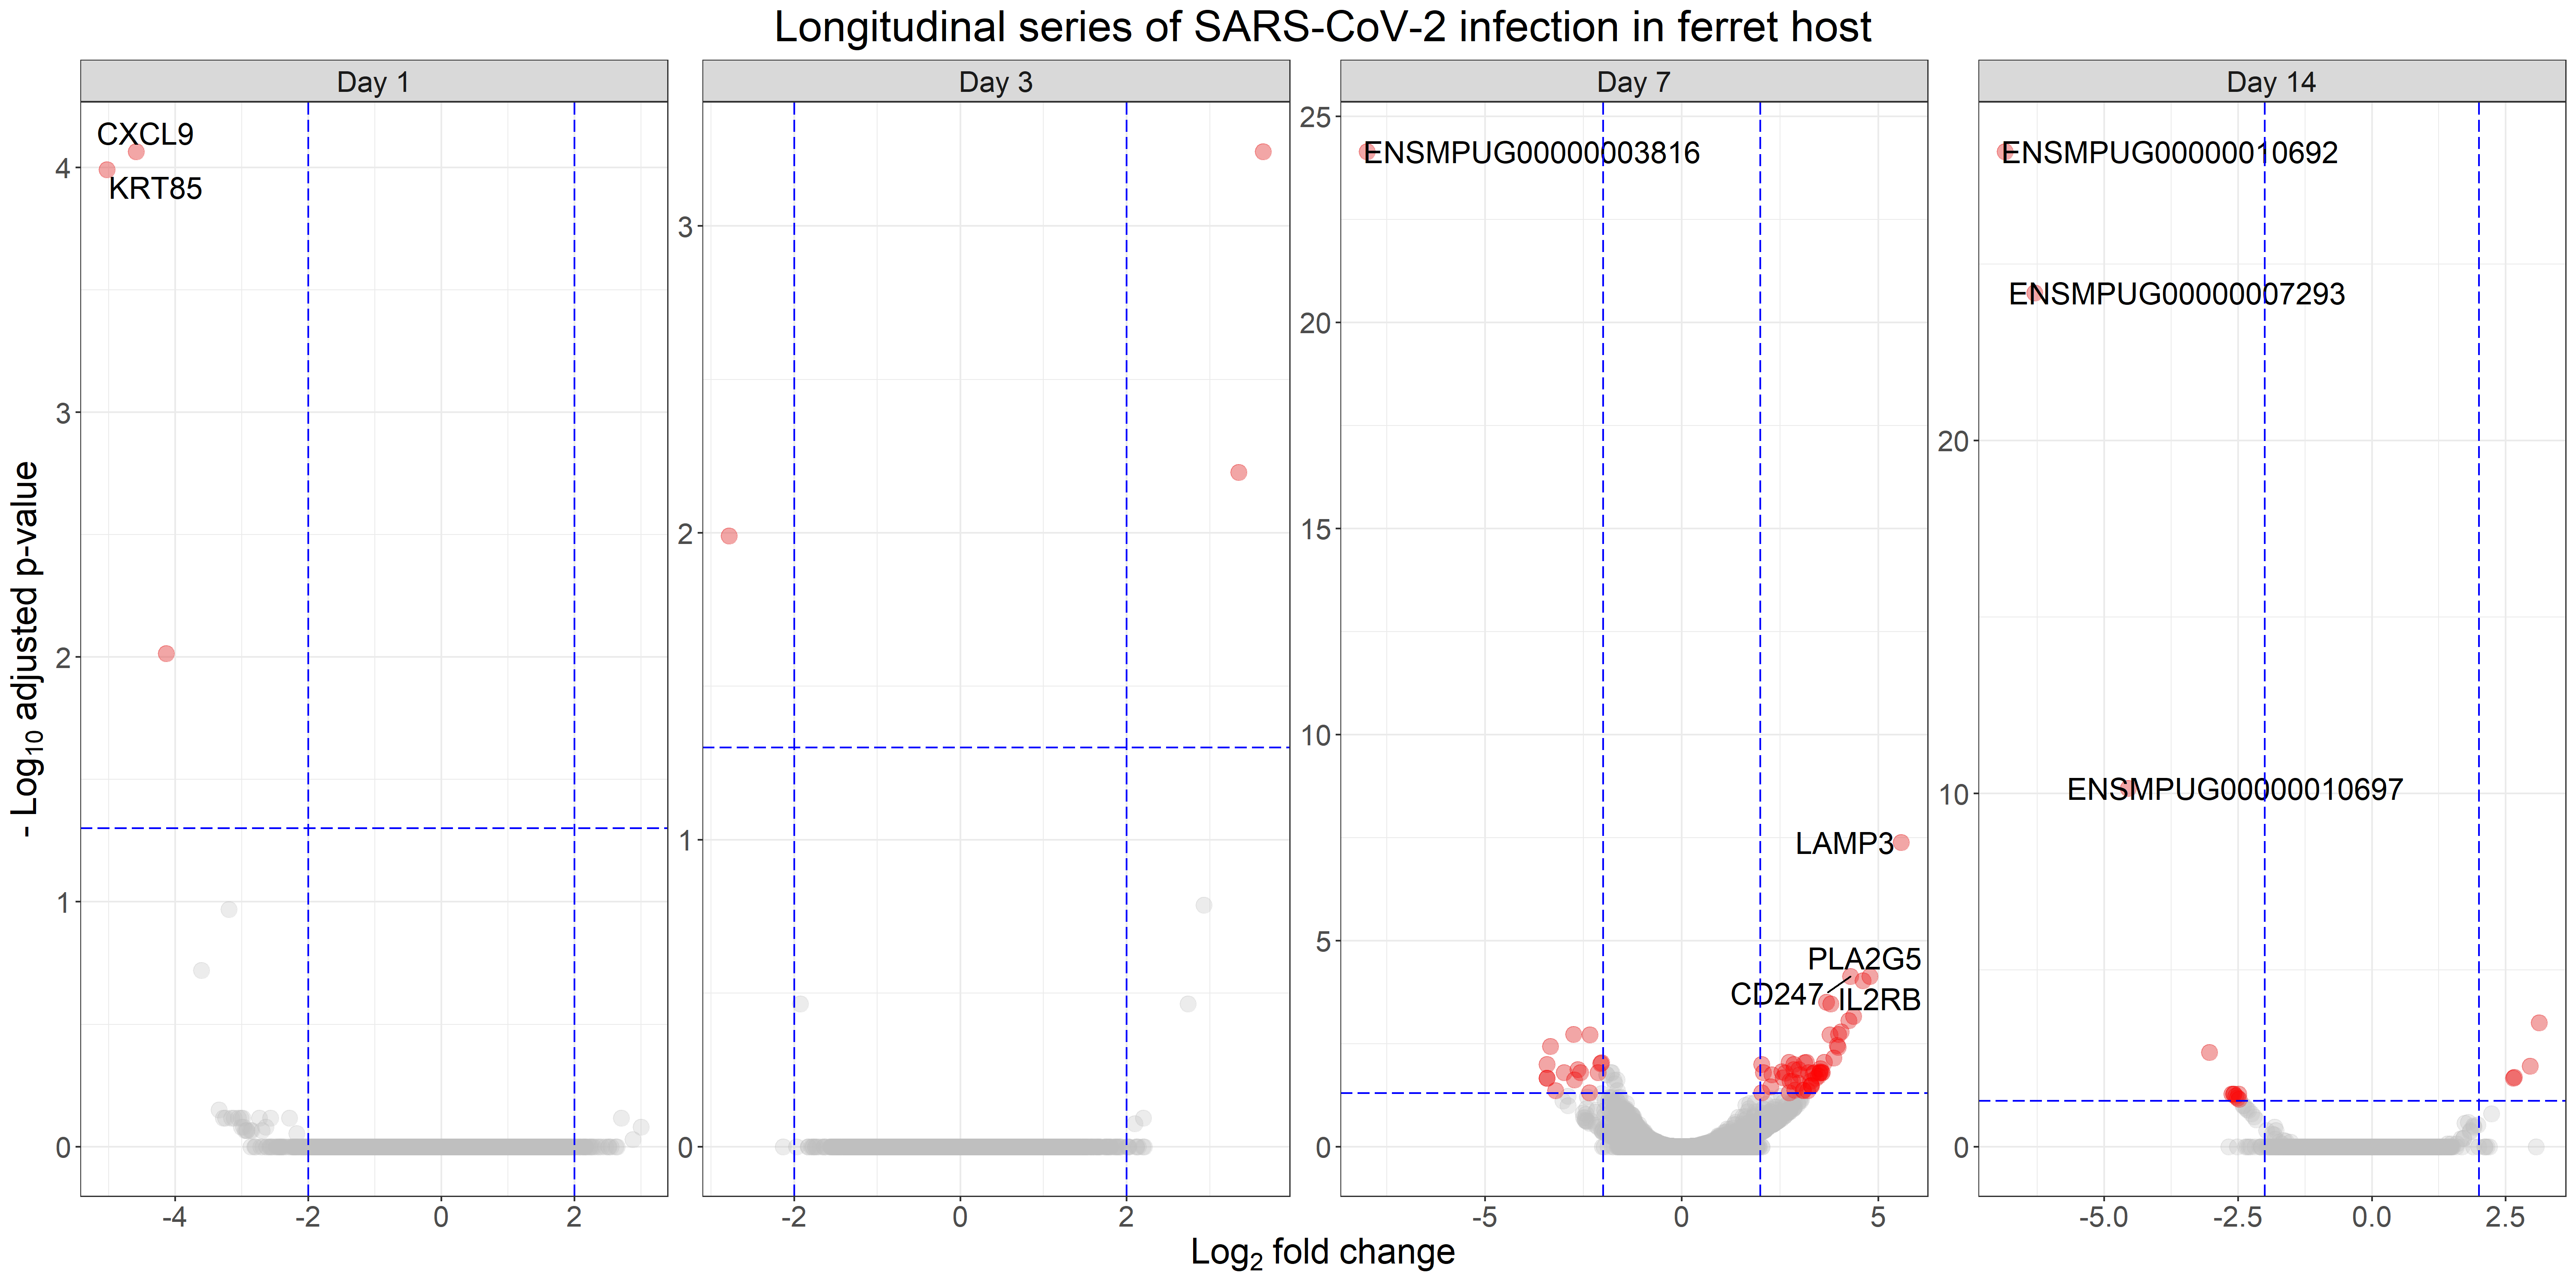

Hints:
1. Notice the addition of long-dashed vertical lines denoting our L2FC cutoff of $\pm$ 2 and a horizontal line for our p-value cutoff of 0.05.
2. What happens when our p-value is 0?
3. The top 10 hits across all 4 timepoints are labelled in the plot
4. How will you relabel each facet?

In [ ]:
# Adjust our plot window size according to the expected output
options(repr.plot.width=20, repr.plot.height=10)

# Remove p-values = 0

# Volcano plot!
ferret_DE_data_long_updated.df %>% 
filter(...) %>% 

# 1. Data
ggplot(.) +
    # 2. Aesthetics
    aes(...) +

    # Themes
    theme_bw()+
    theme(text = element_text(size=20)) +

    ...

***
## 3.1.0 Analysis of volcano plots (3 points)

#### Question: When do we see the greatest amount of variation in our DE data? (1 point)

#### Answer: 

#### Question: Why are our labelled hits spread out across 4 graphs? Why don't we see 10 labels in each facet? (2 points)

#### Answer: 

***
## 3.2.0 Compare Day-7 infection data in a volcano plot (4 points)
 
Now that we see the importance of our day-7 data, let's compare the same DE data set from above except with SARS-CoV-2 infection versus IAV in ferrets for the same timepoint. Please reproduce the following visualization.

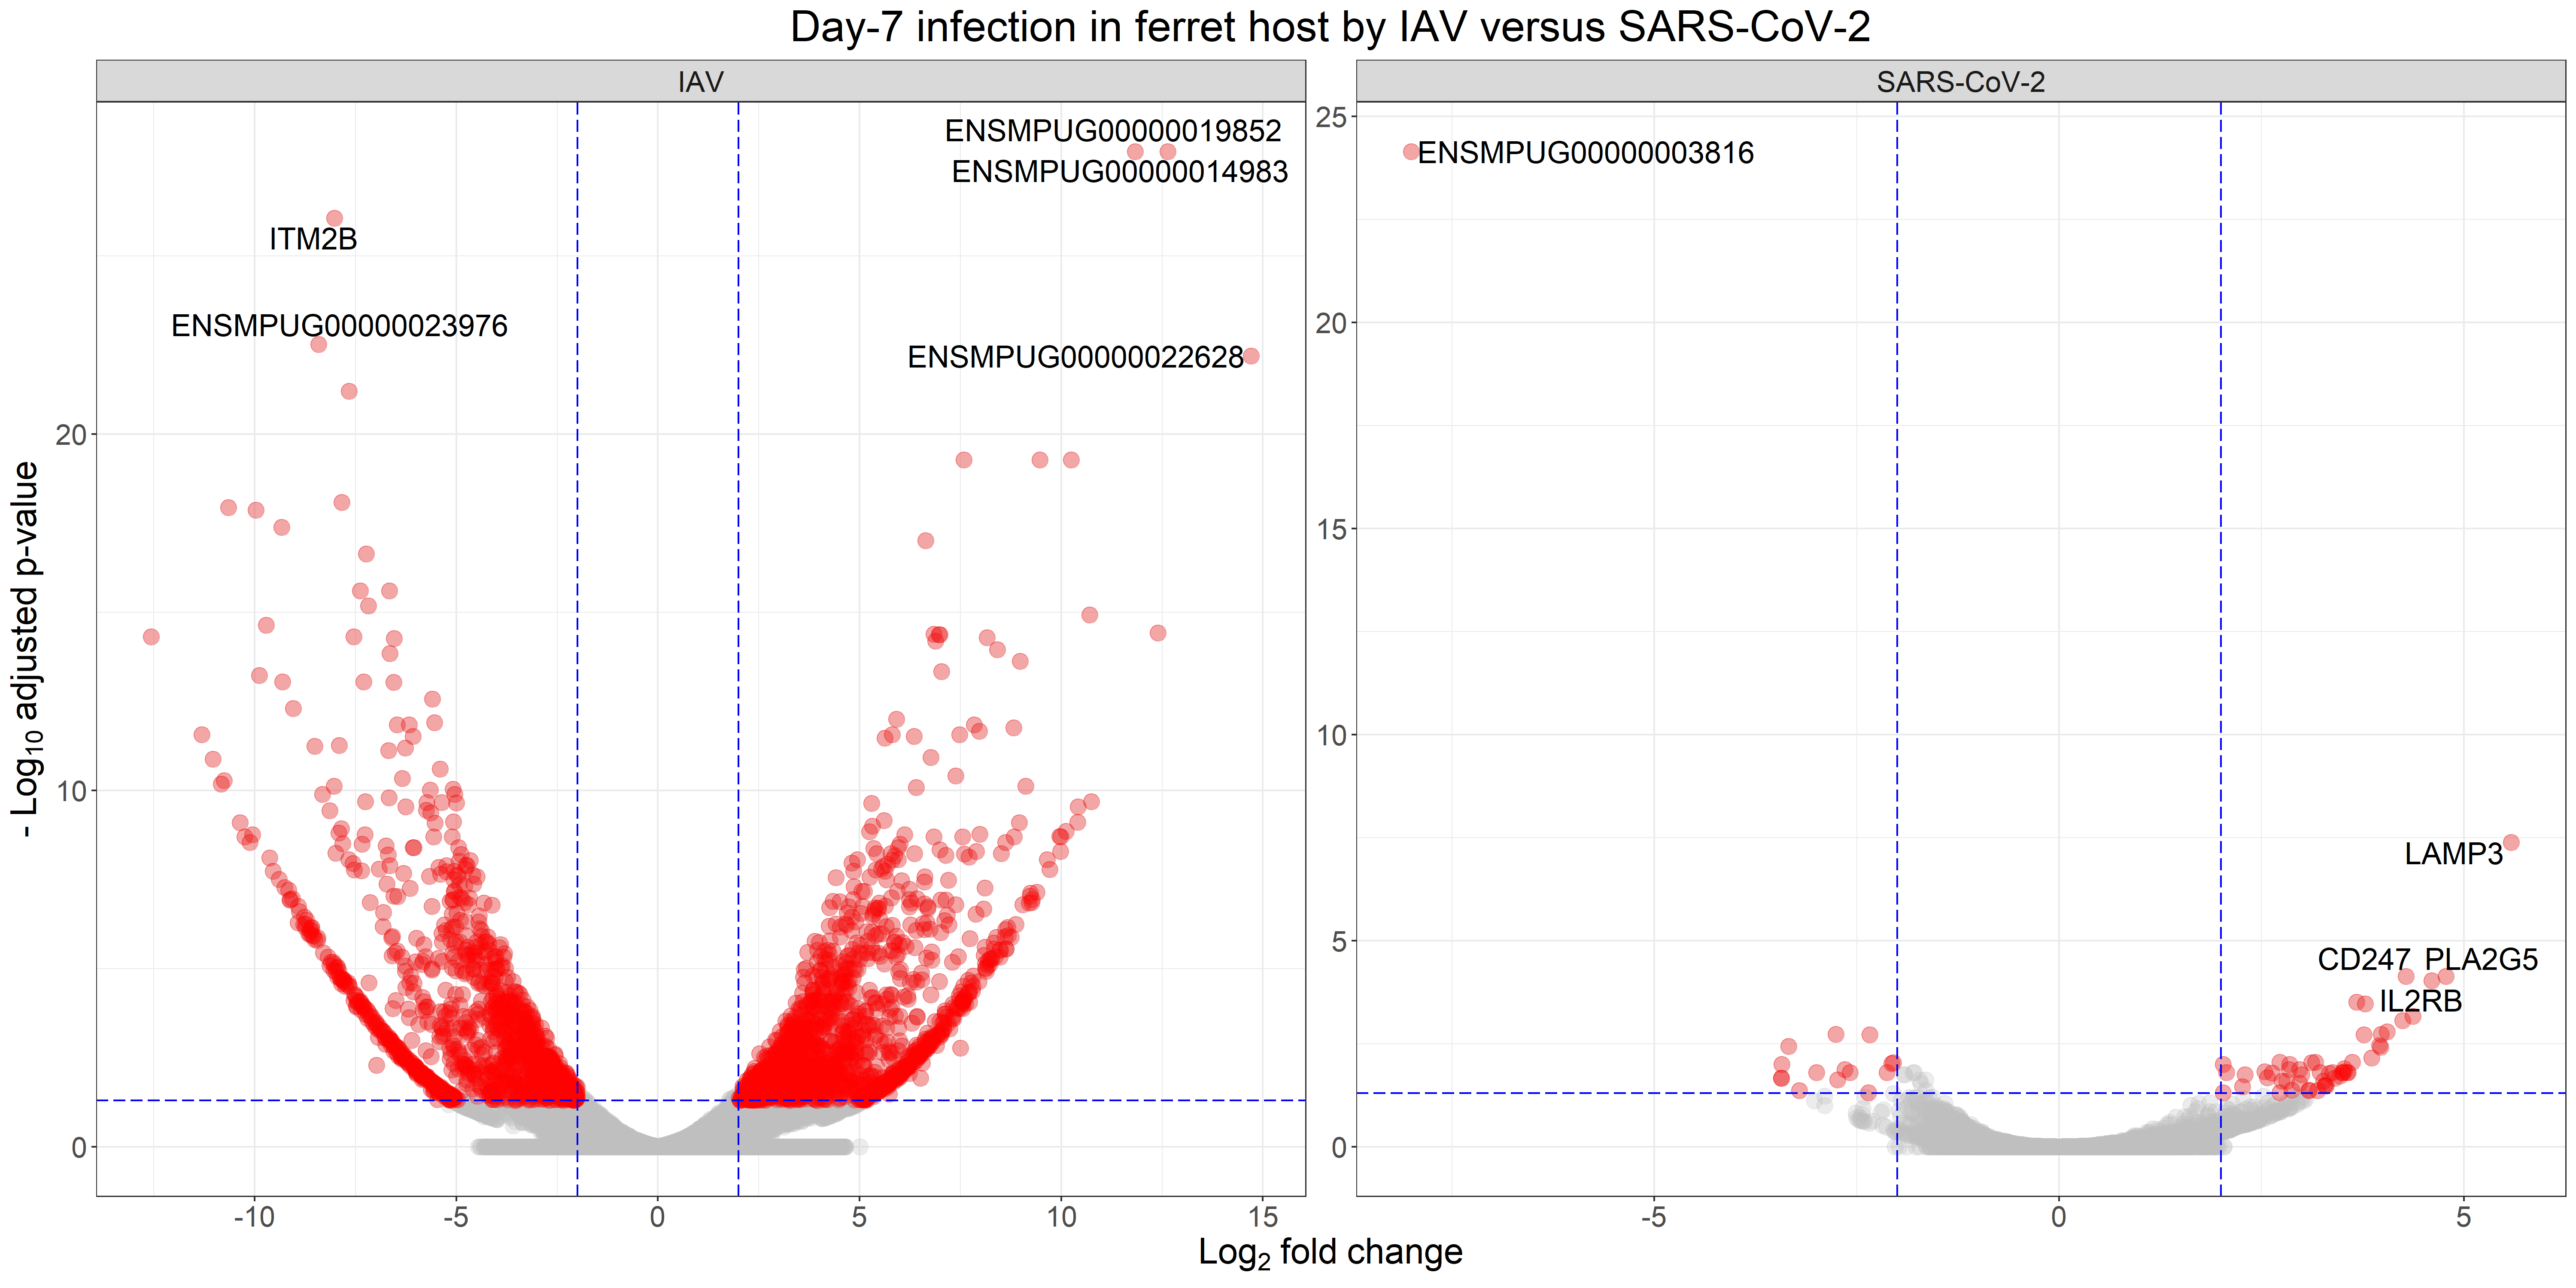

Hint:
1. We are now labelling the top 5 hits in _each_ experiment. 

In [ ]:
# Adjust our plot window size according to the expected output
options(repr.plot.width=20, repr.plot.height=10)

# Remove p-values = 0

# Volcano plot!
ferret_DE_data_long_updated.df %>% 
filter(...) %>% 

# 1. Data
ggplot(.) +
   ...

***
# 4.0.0 Generate an upset plot to examine DE overlap our ferret data (2 points)

Let's do a quick comparison of our datasets now to look for overlapping upregulated genes. To accomplish this we'll use an Upset plot just like we did in lecture. First you'll need to convert `ferret_DE_data_long_updated.df` into the proper matrix. We'll simulate the process with `%>%` without saving it anywhere.

We'll want to set our criteria for converting our data. Use an L2FC >= 1.5 and a p-value of <= 0.05. After that you just need to `select()` the correct columns and `pivot_wider()`. 

In [ ]:
# Generate our upset data
ferret_DE_data_long_updated.df %>% 

# convert our L2FC data to a logical based on a value of >2
mutate(DE_status = ...) %>% 

# Select just the gene names, experiments, and the logical variable
dplyr::select(...) %>%  

# Pivot our data wide so that each experiment is now a row, each gene is a column
pivot_wider(...) %>% 

# save it as a data frame
as.data.frame() %>% 

# Look at it
str()

***
## 4.1.0 Visualize our modified dataset as an Upset plot (3 points)

Now that attempted to generate the correct matrix, you're going to plot the data in `ferret_upset.df` as the following Upset plot. 

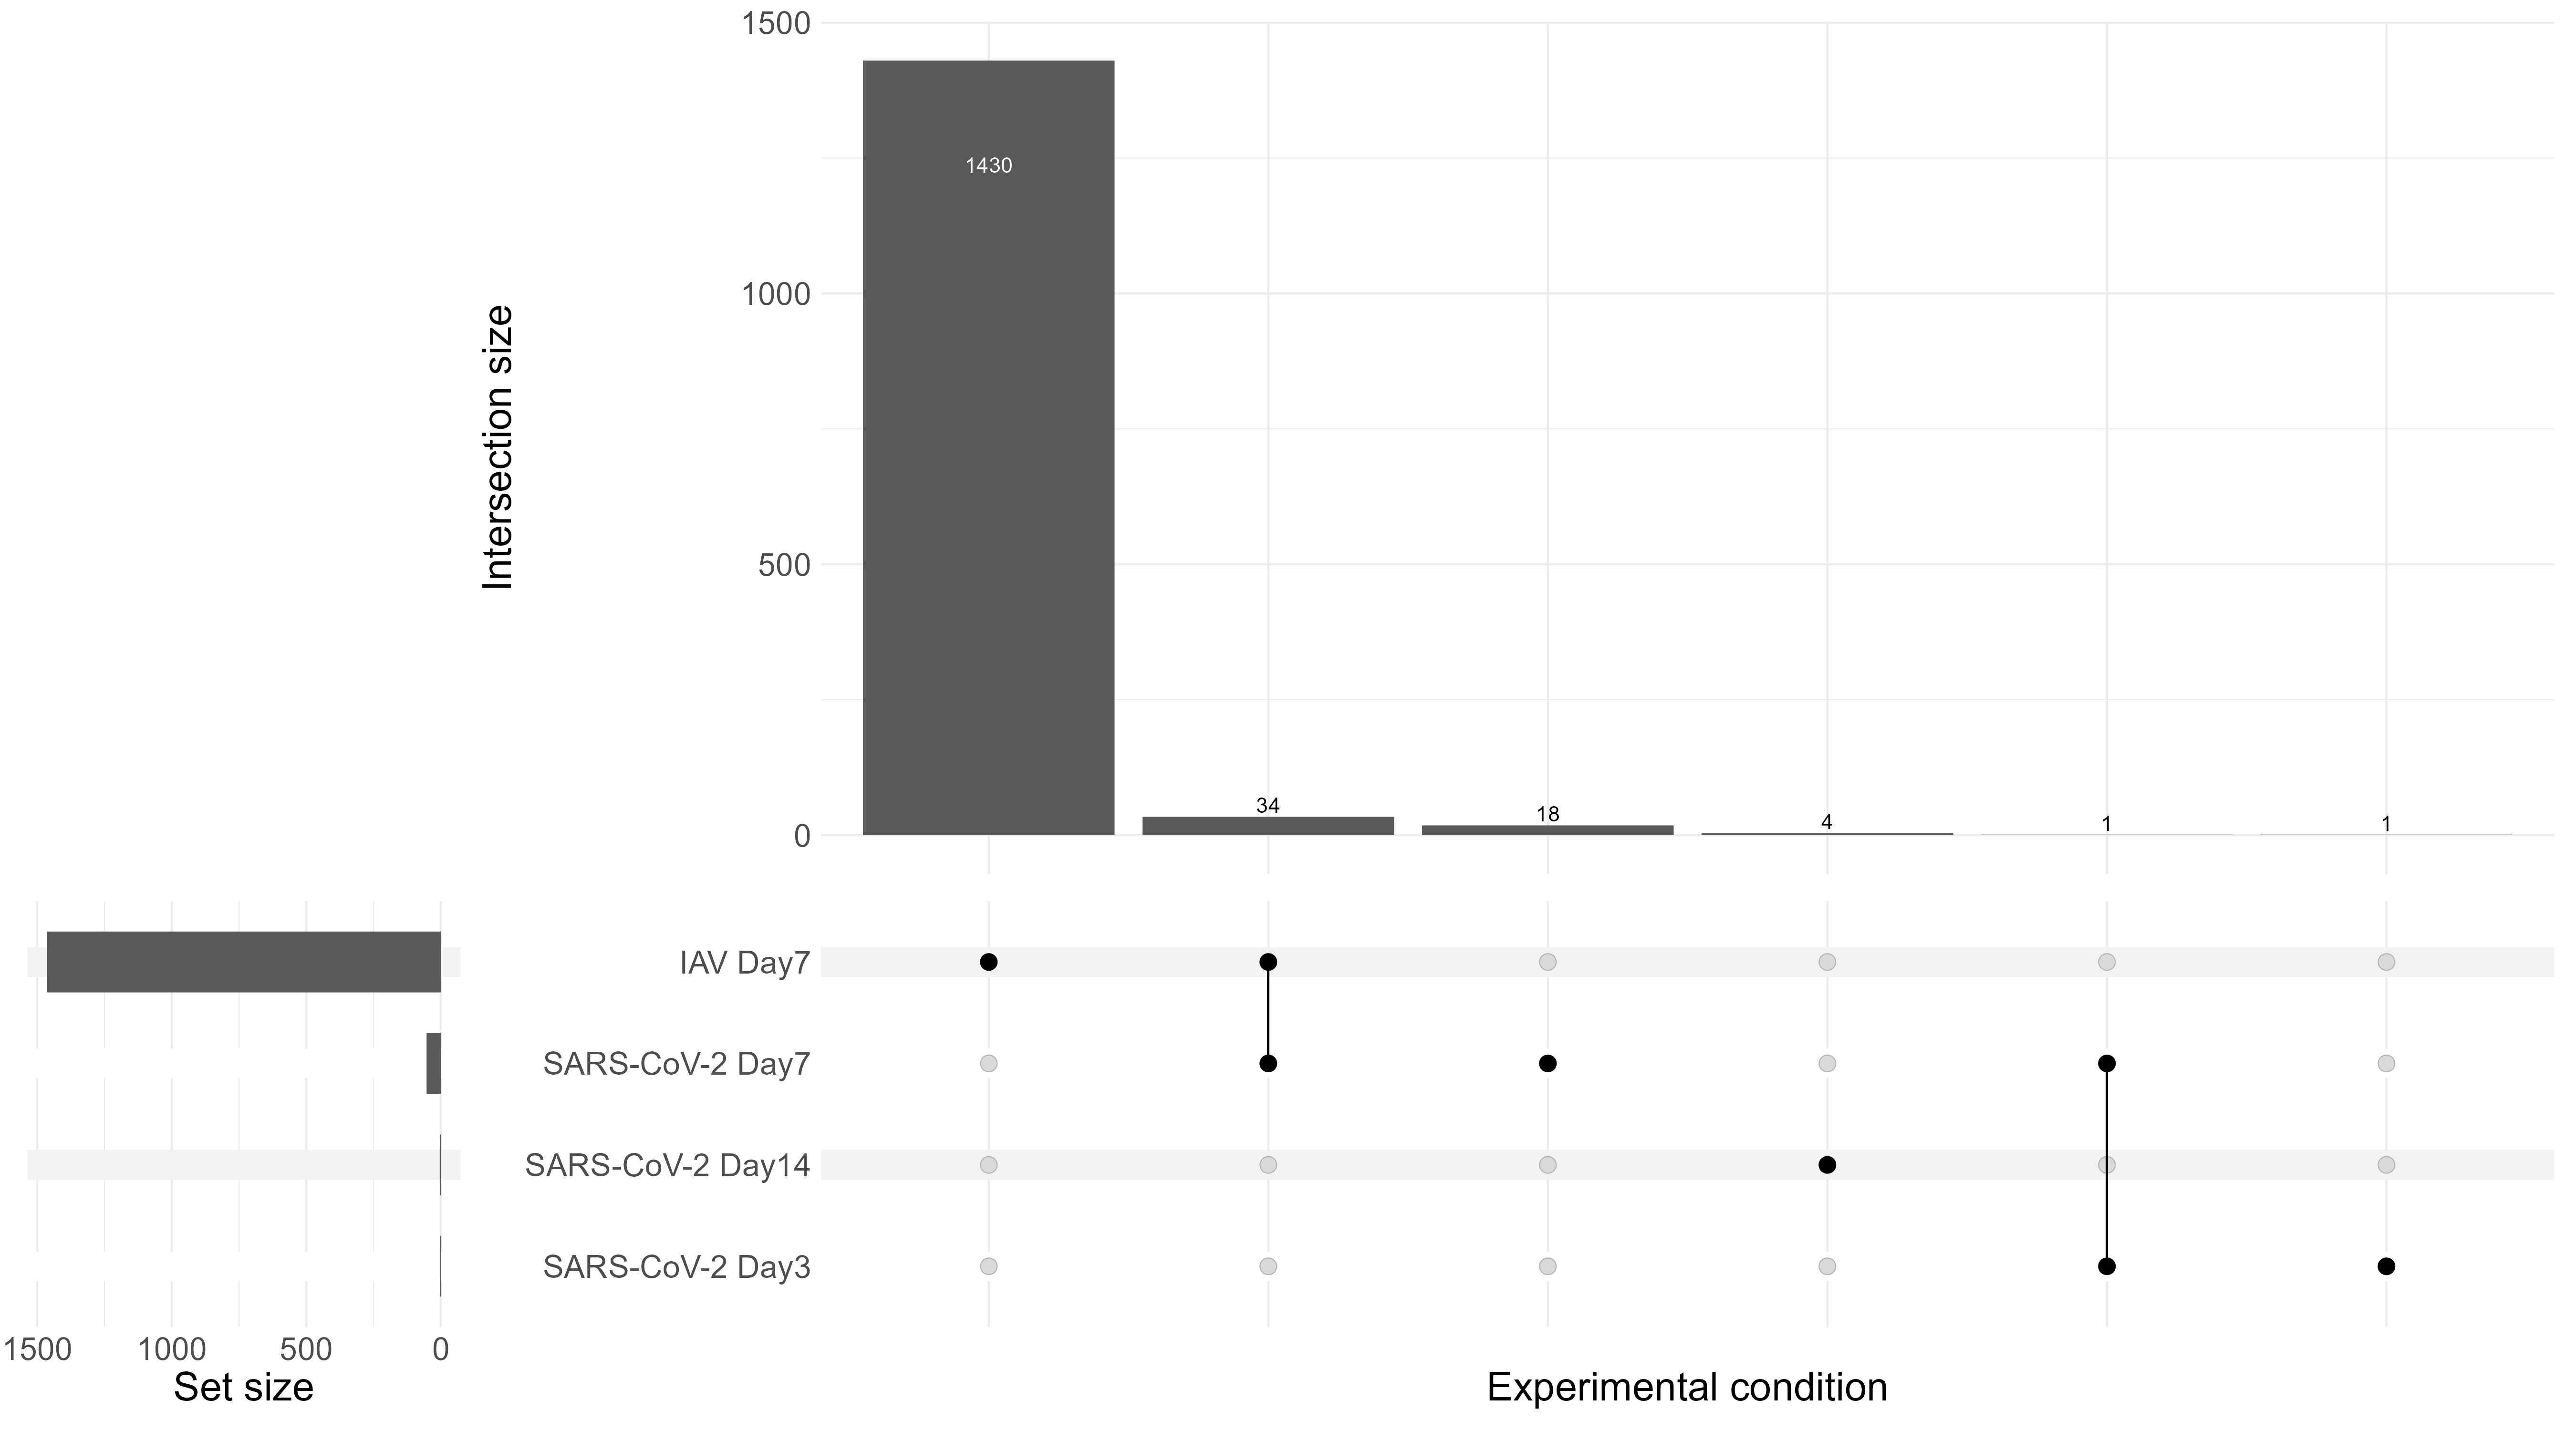

Hints:
1. How many sets will you use? 
2. Take a close look at _all_ of the elements in the example plot.

In [ ]:
# Adjust our plot window size according to the expected output
options(repr.plot.width=18, repr.plot.height=10)

# Generate our upset plot

...

***
## 4.2.0 Upset plot comprehesion (3 points)

#### Question: Which datasets have the most overlap? (1 point)

#### Answer:

#### Question: Which SARS-CoV-2 timepoints share the most overlap? How many are shared? What does this suggest about our experiment? (2 points)

#### Answer: 

# 5.0.0 Assignment rubric

Please provide answers in markdown or code cells that immediately follow each question section. There are __58__ points distributed across this assignment.

|| Assignment breakdown ||
| :-: | :-: | :- | 
| Code | 50% | - Does it follow best practices? |
||| - Does it make good use of available packages? |
||| - Was data prepared properly |
| Answers and Output | 50% | - Is output based on the correct dataset? |
||| - Are groupings appropriate |
||| - Are correct titles/axes/legends correct? |
||| - Is interpretation of the graphs correct? |

Since coding styles and solutions can differ, students are encouraged to use best practices. Assignments _may_ be rewarded for well-coded or elegant solutions.

You can save and download the Jupyter notebook in its native format. Submit this file to the the appropriate assignment section by 1:59pm on the date of our next class: April 7th, 2022.

## 5.1.0 Assignment Difficulty Feedback (1 point bonus)

Since this is still a rather new course, we are always looking to improve on material. Please answer the following questions:

1. Approximately how many hours did you spend completing this assignment?


2. On a scale of 1-10 please rate the difficulty of the assignment. 1 = simple and nothing was learned, 5 = challenging with helpful material learned, 10 = extremely difficult/unable to complete/frustratingly esoteric.


3. Any additional comments can be placed here.